# Statistics: The Science of Decisions Project (P1 in Data Analyst nanodegree)

*by Xiaosong Zhang, December 15$^{th}$ 2016.*

`In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.`

Information, instruction and data are retrieved from  https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True

### 1. What is our independent variable? What is our dependent variable?

In this study, I think the congruentency of the color and text is the independent variable and the response(reading) time is the dependent variable.

### 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

I believe the appropriate set of hypotheses should be (if we want to do a one sample t-test to test if the ture mean of the difference betweent two group is equal to zero):

 $H_0 : \mu_{incongruent} - \mu_{congruent} = 0$ 
   
    The true population mean of congruent group and incongruent group are equal.

$H_a:\mu_{incongruent} - \mu_{congruent} \neq 0$ 

    The true population mean of congruent group and incongruent group are NOT equal.
    
    (Or we could use a two sample t-test to test if the two groups' mean are equal.)

*The reason I think a t-test would be more appropriate is because we do not have information about the population variance $\sigma$. *

*Besides, the distribution of the differences between the congruent and incongruent group is not close to normal nor symmetric. Thus we should not use Z-test since the sample size $n = 24$ is less than 30.*

In [1]:
import csv
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib as plot
#plot.style.use('ggplot')
from IPython.display import display
%matplotlib inline

In [2]:
file = 'stroopdata.csv'
#data = csv.reader(file)

In [3]:
data = pd.read_csv(file)
data.head()

Congruent  Incongruent
0     12.079       19.278
1     16.791       18.741
2      9.564       21.214
3      8.630       15.687
4     14.669       22.803

In [4]:
len(data)

24

### 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

Here I generate some sammary satatistics using .describe() function from Pandas.

In [5]:
data.describe()

Congruent  Incongruent
count  24.000000    24.000000
mean   14.051125    22.015917
std     3.559358     4.797057
min     8.630000    15.687000
25%    11.895250    18.716750
50%    14.356500    21.017500
75%    16.200750    24.051500
max    22.328000    35.255000

### 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fec191e9668>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fec16d075f8>]], dtype=object)

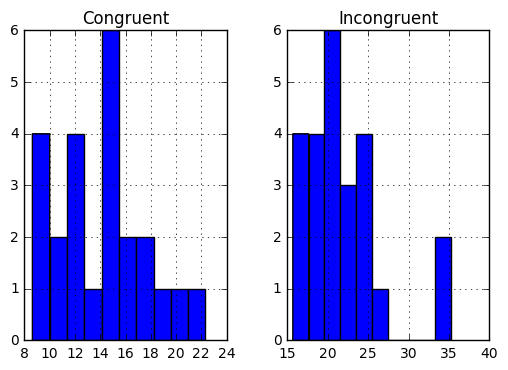

In [6]:
pd.DataFrame.hist(data)

Since the sample size is not very large, the histograms are not looks very smooth. But even with such a small size of sample we already can clearly see the difference between two groups on both center `(14.05 vs 22.02)` and spread `(3.56 vs 4.80)`.

### 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [9]:
diff = data[data.columns[1]] - data[data.columns[0]]
diff.describe()

count    24.000000
mean      7.964792
std       4.864827
min       1.950000
25%       3.645500
50%       7.666500
75%      10.258500
max      21.919000
dtype: float64

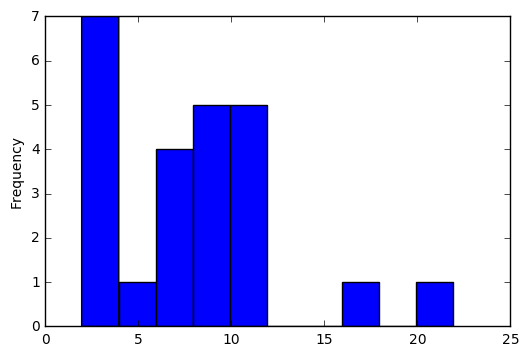

In [10]:
diff.plot('hist')

In [11]:
ss.ttest_1samp(diff,0)

Ttest_1sampResult(statistic=8.020706944109957, pvalue=4.1030005857111781e-08)

This one sample $T-test$ showing a $T-test$ $Statistic > 8.02$ with a corresponding $P-value< 4.10\times10^{-8}$. Based on the data in hand, with such a small $P-value$, we could reject the $Null$ hypothesis at $\alpha = 0.0001$ I am more than 99% confident that the true difference of finish time between the congruent and incongruent group are not equal to zero.

### 6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

The conflict of the color and the text may cause our brain extra time to correct it's built-in conditioned reflection.

The similar experiments could be designed for any abnormal reaction model that contradict our normal behavior pattern. 
For example, if we tell a group of people to stand up if we say "sit down" and raise their hand when they heard "turn around", it might force them to built new, previously non-existant connection between vocal command and action. If the command "mapping" are complicated enough and repeat randomly, and frequently we could also expect to see an increase in response time and error rate.